In [1]:
print('Hello World!')

Hello World!


In [3]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf


In [6]:
def load_audio(file_path):
    """
    Load an audio file.

    Parameters:
    - file_path: str, path to the audio file.

    Returns:
    - y: np.ndarray, audio time series.
    - sr: int, sampling rate.
    """
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

# Usage
file_path = r'C:\Users\syrym\Downloads\research_2\audio.wav'
audio_data, sample_rate = load_audio(file_path)


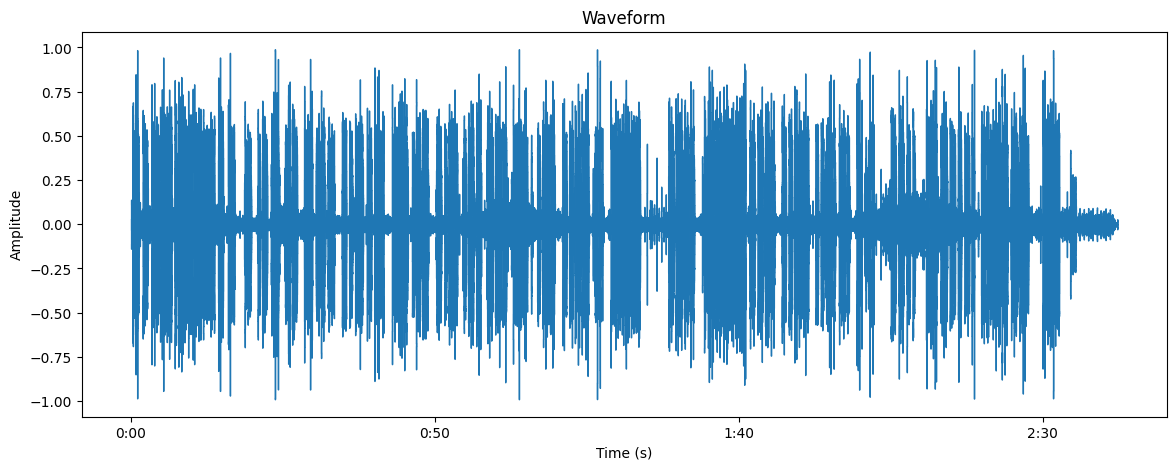

In [7]:
def plot_waveform(y, sr):
    """
    Plot the waveform of an audio signal.

    Parameters:
    - y: np.ndarray, audio time series.
    - sr: int, sampling rate.
    """
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Usage
plot_waveform(audio_data, sample_rate)


In [8]:
def split_voice_silence(y, sr, frame_length=2048, hop_length=512, threshold=0.02):
    """
    Split audio into voice and silence using energy thresholding.

    Parameters:
    - y: np.ndarray, audio time series.
    - sr: int, sampling rate.
    - frame_length: int, length of the frames for analysis.
    - hop_length: int, number of samples between successive frames.
    - threshold: float, energy threshold for voice detection.

    Returns:
    - t: np.ndarray, time stamps for each frame.
    - energy: np.ndarray, energy of each frame.
    - voice_frames: np.ndarray, boolean array indicating voice frames.
    """
    # Compute short-time energy
    energy = np.array([
        np.sum(np.abs(y[i:i+frame_length]**2))
        for i in range(0, len(y), hop_length)
    ])

    # Normalize energy
    energy /= np.max(energy)

    # Detect voice frames
    voice_frames = energy > threshold

    # Get the times for each frame
    frames = np.arange(len(energy))
    t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

    return t, energy, voice_frames

# Usage
times, energy, voice_frames = split_voice_silence(audio_data, sample_rate)


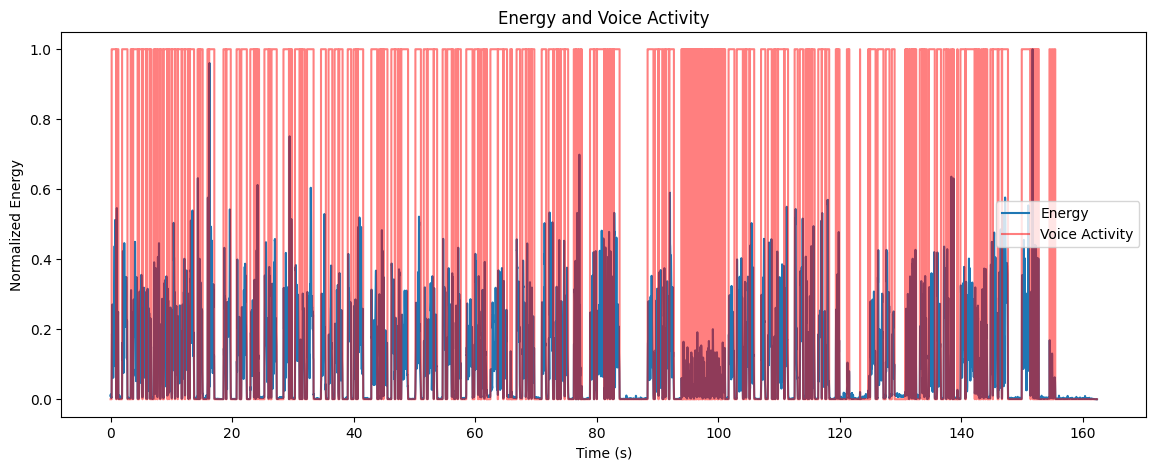

In [9]:
def plot_energy_voice_activity(t, energy, voice_frames):
    """
    Plot energy and voice activity over time.

    Parameters:
    - t: np.ndarray, time stamps.
    - energy: np.ndarray, energy values.
    - voice_frames: np.ndarray, boolean array indicating voice frames.
    """
    plt.figure(figsize=(14, 5))
    plt.plot(t, energy, label='Energy')
    plt.step(t, voice_frames * np.max(energy), where='post', color='r', alpha=0.5, label='Voice Activity')
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized Energy')
    plt.title('Energy and Voice Activity')
    plt.legend()
    plt.show()

# Usage
plot_energy_voice_activity(times, energy, voice_frames)


In [10]:
def extract_mfcc(y, sr, n_mfcc=13):
    """
    Extract MFCC features from audio signal.

    Parameters:
    - y: np.ndarray, audio time series.
    - sr: int, sampling rate.
    - n_mfcc: int, number of MFCCs to return.

    Returns:
    - mfccs: np.ndarray, MFCC feature matrix.
    """
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs

# Usage
mfccs = extract_mfcc(audio_data, sample_rate)


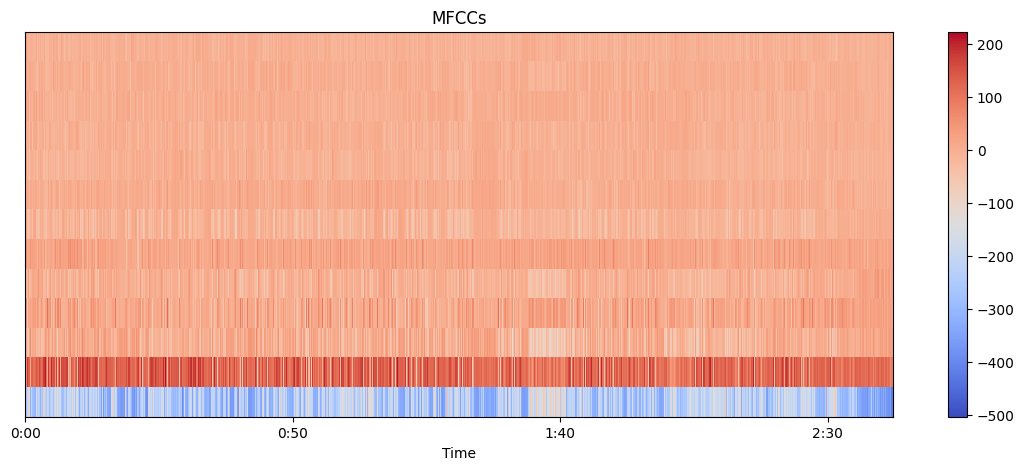

In [11]:
def plot_mfccs(mfccs, sr):
    """
    Visualize MFCCs as a spectrogram.

    Parameters:
    - mfccs: np.ndarray, MFCC feature matrix.
    - sr: int, sampling rate.
    """
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(mfccs, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title('MFCCs')
    plt.show()

# Usage
plot_mfccs(mfccs, sample_rate)


In [12]:
def save_features_to_csv(mfccs, voice_frames, times, output_dir='output'):
    """
    Save MFCCs and voice activity to CSV files.

    Parameters:
    - mfccs: np.ndarray, MFCC feature matrix.
    - voice_frames: np.ndarray, boolean array indicating voice frames.
    - times: np.ndarray, time stamps for each frame.
    - output_dir: str, directory to save the CSV files.
    """
    import os
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save MFCCs
    mfccs_df = pd.DataFrame(mfccs.T)
    mfccs_df.to_csv(os.path.join(output_dir, 'mfccs.csv'), index=False)

    # Save Voice Activity
    voice_activity_df = pd.DataFrame({
        'Time': times,
        'Voice_Activity': voice_frames.astype(int)
    })
    voice_activity_df.to_csv(os.path.join(output_dir, 'voice_activity.csv'), index=False)

# Usage
save_features_to_csv(mfccs, voice_frames, times)


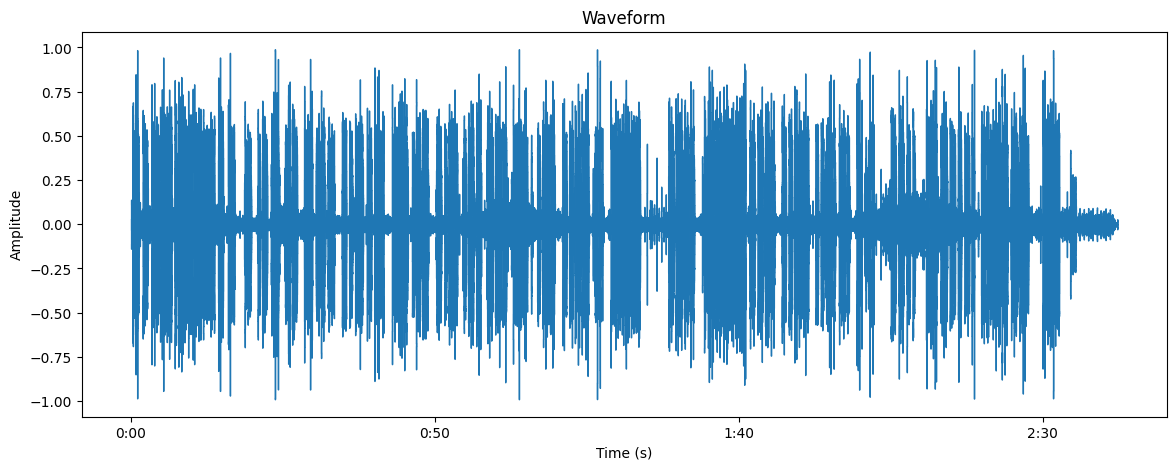

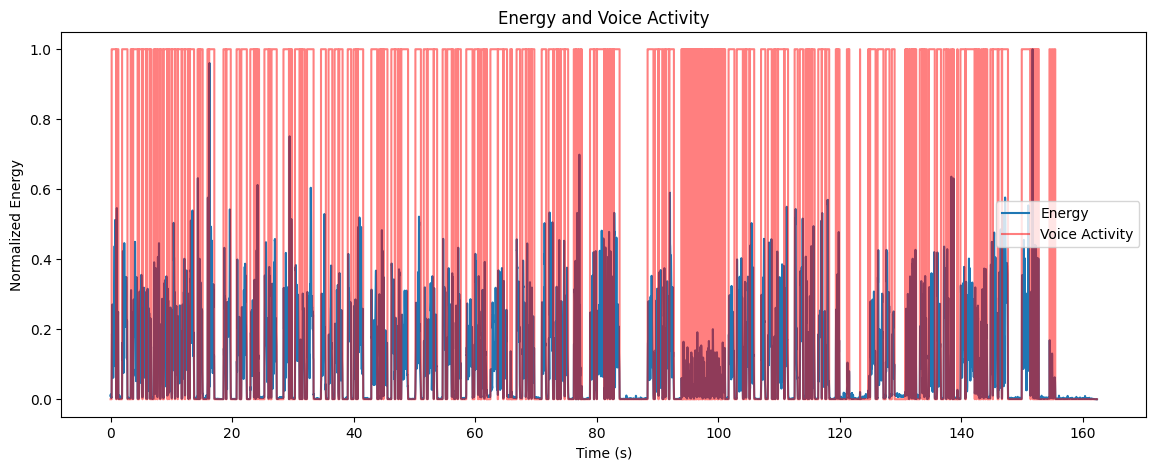

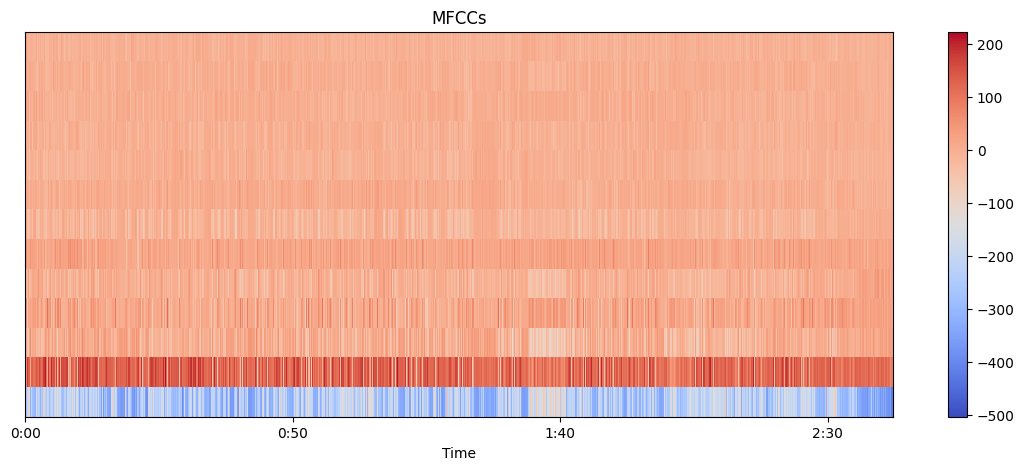

In [13]:
def main():
    # Load audio
    file_path = r'C:\Users\syrym\Downloads\research_2\audio.wav'
    y, sr = load_audio(file_path)

    # Plot waveform
    plot_waveform(y, sr)

    # Split voice and silence
    t, energy, voice_frames = split_voice_silence(y, sr)

    # Plot energy and voice activity
    plot_energy_voice_activity(t, energy, voice_frames)

    # Extract MFCCs
    mfccs = extract_mfcc(y, sr)

    # Plot MFCCs
    plot_mfccs(mfccs, sr)

    # Save features to CSV
    save_features_to_csv(mfccs, voice_frames, t)

# Run the main function
if __name__ == '__main__':
    main()
